In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import matplotlib.style as style

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy


from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import lars_path
style.use('fivethirtyeight')

## EDA

In [4]:
car_sales = pd.read_csv('Dataset/MacroEconDatasets/Car_Sales_Numbers.csv', index_col=0, parse_dates=True)
car_sales = car_sales.rename(columns={'ALTSALES':'Cars_Sold_e6'})
car_sales.head()
car_sales_diff1 = car_sales.diff().fillna(car_sales)
car_sales_diff2 = car_sales_diff1.diff().fillna(car_sales_diff1)
#car_sales_diff2.isnull().values.any()

/Users/samypalaniappan/opt/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


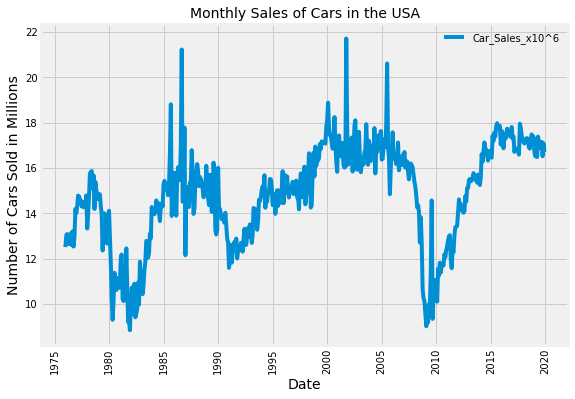

In [5]:
fig, ax= plt.subplots(figsize=(8,5))
fig.tight_layout()
ax.plot(car_sales, label='Car_Sales_x10^6')
#ax.plot(car_sales_diff2, label='Car_Sales_Diff2', color='red')
ax.legend(loc='best', frameon=False)
plt.xticks(rotation=90)
plt.ylabel('Number of Cars Sold in Millions', size=14)
plt.xlabel('Date', size=14)
plt.title('Monthly Sales of Cars in the USA', size=14)
plt.show()

In [9]:
population = pd.read_csv('Dataset/MacroEconDatasets/Population.csv', parse_dates=True)
#population.iloc[:,1] = population.iloc[:,1]/(10**6)
population = population.rename(columns={'LFWA64TTUSM647S':'Population_e6'})
population = population.set_index('DATE')
population.head()

population_diff1 = population.diff().fillna(population)
population_diff2 = population_diff1.diff().fillna(population_diff1)
population_diff2.isnull().values.any()
population_diff1.head()

,Population_e6
DATE,
1977-01-01,1.352095e+08
1977-02-01,1.570527e+05
1977-03-01,2.753963e+05
1977-04-01,1.990996e+05
1977-05-01,3.667207e+05


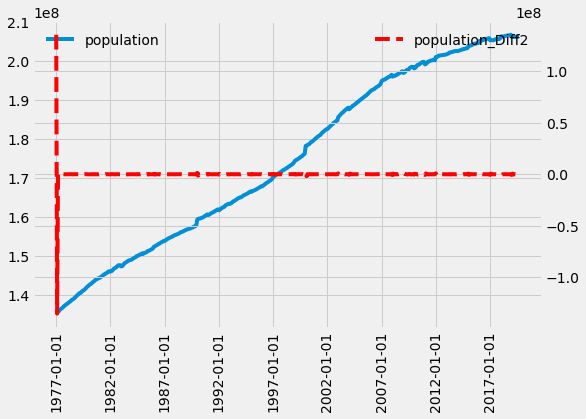

In [5]:
fig, ax1= plt.subplots(figsize=(8,5))
fig.tight_layout()
color = 'tab:blue'
ax1.plot(population, label='population')
ax1.legend(loc='best', frameon=False)
ax1.tick_params(axis='x', rotation=90)

color = 'tab:red'
ax2 = ax1.twinx()
ax2.plot(population_diff2, linestyle='dashed', color='red', label='population_Diff2')
ax2.legend(loc='best', frameon=False)
#ax2.set_ylim(-2, 2)

ax1.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=90)
plt.show()

In [6]:
IR = pd.read_csv('Auto_Interest_Rates.csv', parse_dates=True)
IR = IR.rename(columns={'TERMCBAUTO48NS':'Interest_rate'})
IR = IR.set_index('DATE')
IR.head()

IR['Interest_rate'] = IR['Interest_rate'].apply(pd.to_numeric, errors='coerce')
IR=IR.dropna()
IR_diff1 = IR.diff().fillna(IR)
IR_diff2 = IR_diff1.diff().fillna(IR_diff1)
IR_diff2.isnull().values.any()

False

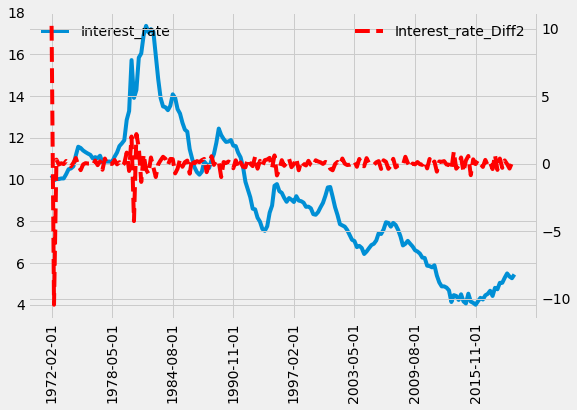

In [7]:
fig, ax1= plt.subplots(figsize=(8,5))
fig.tight_layout()
color = 'tab:blue'
ax1.plot(IR, label='Interest_rate')
ax1.legend(loc='upper left', frameon=False)
ax1.tick_params(axis='x', rotation=90)

color = 'tab:red'
ax2 = ax1.twinx()
ax2.plot(IR_diff2, linestyle='dashed', color='red', label='Interest_rate_Diff2')
ax2.legend(loc='best', frameon=False)
#x2.set_ylim(-2, 2)

ax1.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=90)
plt.show()

In [8]:
CC = pd.read_csv('Cons_Confidence.csv', parse_dates=True)
CC = CC.rename(columns={'UMCSENT':'Cons_conf'})
CC = CC.set_index('DATE')
CC.head()

# CC['Cons_conf'] = IR['Cons_conf'].apply(pd.to_numeric, errors='coerce')
CC=CC.dropna()
CC_diff1 = CC.diff().fillna(CC)
CC_diff2 = CC_diff1.diff().fillna(CC_diff1)
CC_diff2.isnull().values.any()

False

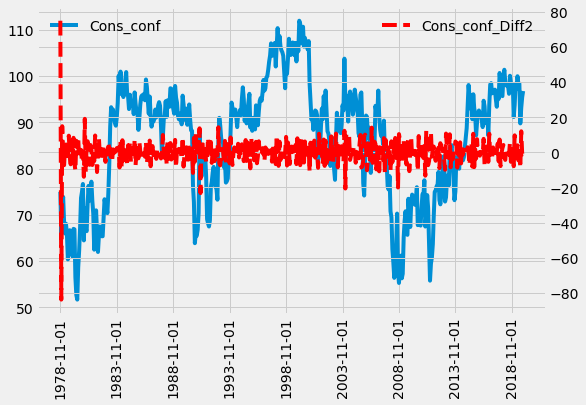

In [9]:
fig, ax1= plt.subplots(figsize=(8,5))
fig.tight_layout()
color = 'tab:blue'
ax1.plot(CC, label='Cons_conf')
ax1.legend(loc='upper left', frameon=False)
ax1.tick_params(axis='x', rotation=90)

color = 'tab:red'
ax2 = ax1.twinx()
ax2.plot(CC_diff2, linestyle='dashed', color='red', label='Cons_conf_Diff2')
ax2.legend(loc='best', frameon=False)
#x2.set_ylim(-2, 2)

ax1.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=90)
plt.show()

In [10]:
djia = pd.read_csv('DJIA.csv', parse_dates=True)
djia = djia.rename(columns={'Adj Close':'DJIA', 'Date':'DATE'})
cols = ['DATE', 'DJIA']
djia = djia[cols]
djia.head()
djia = djia.set_index('DATE')
djia_diff1 = djia.diff().fillna(djia)
djia_diff2 = djia_diff1.diff().fillna(djia_diff1)
djia_diff2.isnull().values.any()

False

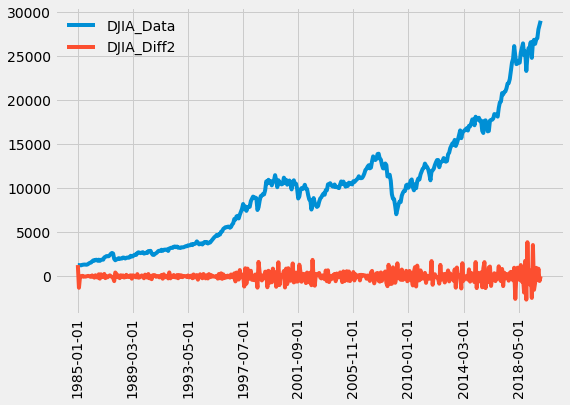

In [11]:
fig, ax= plt.subplots(figsize=(8,5))
fig.tight_layout()
ax.plot(djia, label='DJIA_Data')
ax.plot(djia_diff2, label='DJIA_Diff2')
ax.legend(loc='best', frameon=False)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=90)
plt.show()

In [12]:
gold = pd.read_csv('Gold_prices.csv', parse_dates=True)
gold = gold.rename(columns={'GOLDAMGBD228NLBM':'Gold_Price_Index'})
gold.fillna(0)
gold = gold.set_index('DATE')
#print(type(gold.Gold_Price_Index[2]))
gold['Gold_Price_Index'] = gold['Gold_Price_Index'].apply(pd.to_numeric, errors='coerce')
gold.head()
gold=gold.dropna()
gold_diff1 = gold.diff().fillna(gold)
gold_diff2 = gold_diff1.diff().fillna(gold_diff1)
gold_diff2.isnull().values.any()

False

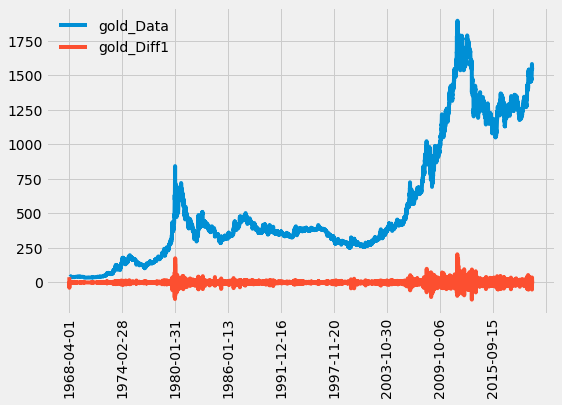

In [13]:
fig, ax= plt.subplots(figsize=(8,5))
fig.tight_layout()
ax.plot(gold, label='gold_Data')
ax.plot(gold_diff2, label='gold_Diff1')
ax.legend(loc='best', frameon=False)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=90)
plt.show()

In [14]:
gdp = pd.read_excel('GDP.xlsx', sheet_name='Monthly Data Sheet', header=1)
gdp = gdp.rename(columns={'Month-Year':'DATE', 'Stock-Watson Real GDP':'GDP'})
gdp['DATE']=gdp['DATE'].astype(str)
cols = ['DATE', 'GDP']
gdp = gdp[cols]
#,'States':'United_States','east':'Northeast','West':'Midwest','Unnamed: 4':'South','Unnamed: 5':'West'})
gdp=gdp.set_index('DATE')
gdp=gdp.dropna()
gdp.head()
gdp_diff1 = gdp.diff().fillna(gdp)
gdp_diff2 = gdp_diff1.diff().fillna(gdp_diff1)
gdp_diff2.isnull().values.any()

False

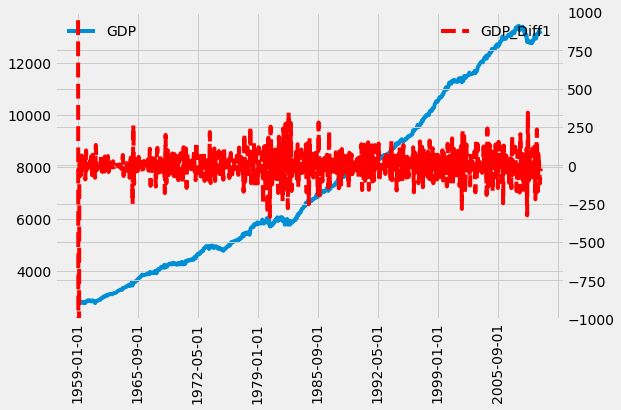

In [15]:
fig, ax1= plt.subplots(figsize=(8,5))
fig.tight_layout()
color = 'tab:blue'
ax1.plot(gdp, label='GDP')
ax1.legend(loc='best', frameon=False)
ax1.tick_params(axis='x', rotation=90)

color = 'tab:red'
ax2 = ax1.twinx()
ax2.plot(gdp_diff2, linestyle='dashed', color='red', label='GDP_Diff1')
ax2.legend(loc='best', frameon=False)
ax2.set_ylim(-1000, 1000)

ax1.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=90)
plt.show()

In [16]:
wti = pd.read_csv('WTI_Crude_Oil.csv', parse_dates=True)
wti = wti.rename(columns={'DCOILWTICO':'WTI'})#,'States':'United_States','east':'Northeast','West':'Midwest','Unnamed: 4':'South','Unnamed: 5':'West'})
#wti=wti.fillna(0)
wti=wti.set_index('DATE')
wti.head()
wti['WTI']=wti['WTI'].apply(pd.to_numeric, errors='coerce')
wti=wti.dropna()
wti_diff1 = wti.diff().fillna(wti)
wti_diff2 = wti_diff1.diff().fillna(wti_diff1)
wti_diff2.isnull().values.any()

False

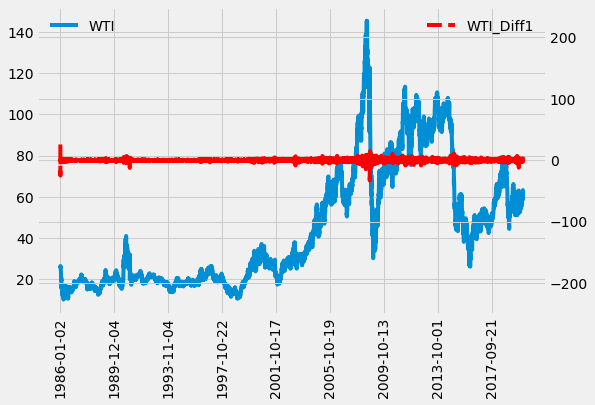

In [17]:
fig, ax1= plt.subplots(figsize=(8,5))
fig.tight_layout()
color = 'tab:blue'
ax1.plot(wti, label='WTI')
ax1.legend(loc='upper left', frameon=False)
ax1.tick_params(axis='x', rotation=90)

color = 'tab:red'
ax2 = ax1.twinx()
ax2.plot(wti_diff2, linestyle='dashed', color='red', label='WTI_Diff1')
ax2.legend(loc='best', frameon=False)
ax2.set_ylim(-250, 250)

ax1.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=90)
plt.show()

In [18]:
unemployment = pd.read_csv('Unemployment.csv', parse_dates=True)
unemployment = unemployment.rename(columns={'UNRATE':'Unemp_rate'})#,'States':'United_States','east':'Northeast','West':'Midwest','Unnamed: 4':'South','Unnamed: 5':'West'})
unemployment=unemployment.set_index('DATE')
unemployment.head()
unemployment['Unemp_rate']=unemployment['Unemp_rate'].apply(pd.to_numeric, errors='coerce')
unemployment_diff1 = unemployment.diff().fillna(unemployment)
unemployment_diff2 = unemployment_diff1.diff().fillna(unemployment_diff1)
unemployment_diff2.isnull().values.any()

False

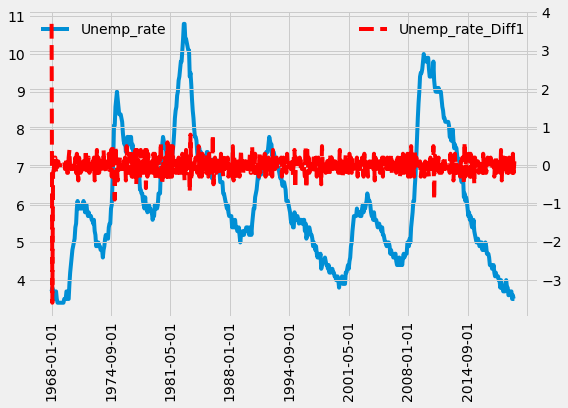

In [19]:
fig, ax1= plt.subplots(figsize=(8,5))
fig.tight_layout()
color = 'tab:blue'
ax1.plot(unemployment, label='Unemp_rate')
ax1.legend(loc='upper left', frameon=False)
ax1.tick_params(axis='x', rotation=90)

color = 'tab:red'
ax2 = ax1.twinx()
ax2.plot(unemployment_diff2, linestyle='dashed', color='red', label='Unemp_rate_Diff1')
ax2.legend(loc='best', frameon=False)
#ax2.set_ylim(-250, 250)

ax1.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=90)
plt.show()

In [20]:
house = pd.read_csv('house.csv', parse_dates=True)
house = house.rename(columns={'HSN1F':'Houses_Sold_e3'})#:'United_States','east':'Northeast','West':'Midwest','Unnamed: 4':'South','Unnamed: 5':'West'})
house=house.set_index('DATE')
house.head()
house['Houses_Sold_e3']=house['Houses_Sold_e3'].apply(pd.to_numeric, errors='coerce')*1000
house_diff1 = house.diff().fillna(house)
house_diff2 = house_diff1.diff().fillna(house_diff1)
house_diff2.isnull().values.any()


False

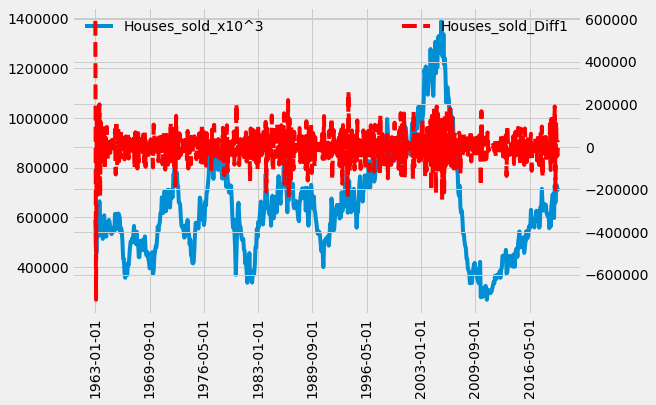

In [21]:
fig, ax1= plt.subplots(figsize=(8,5))
fig.tight_layout()
color = 'tab:blue'
ax1.plot(house, label='Houses_sold_x10^3')
ax1.legend(loc='upper left', frameon=False)
ax1.tick_params(axis='x', rotation=90)

color = 'tab:red'
ax2 = ax1.twinx()
ax2.plot(house_diff2, linestyle='dashed', color='red', label='Houses_sold_Diff1')
ax2.legend(loc='best', frameon=False)
#ax2.set_ylim(-250, 250)

ax1.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=90)
plt.show()

In [22]:
result = pd.merge(left=car_sales, right=population, left_index=True, right_index=True)
result_diff = pd.merge(left=car_sales_diff2, right=population_diff2, left_index=True, right_index=True)  
result_diff

,Cars_Sold_e6,Population_e6
DATE,,
1977-01-01,-1.369,1.352095e+08
1977-02-01,0.494,-1.350524e+08
1977-03-01,0.131,1.183436e+05
1977-04-01,-0.476,-7.629669e+04
1977-05-01,-0.119,1.676211e+05
...,...,...
2019-05-01,1.678,1.465193e+05
2019-06-01,-1.109,5.374363e+04
2019-07-01,-0.095,-1.932253e+05


In [23]:
result = pd.merge(result, right=unemployment, left_index=True, right_index=True)
result_diff = pd.merge(result_diff, right=unemployment_diff2, left_index=True, right_index=True)  
result_diff

,Cars_Sold_e6,Population_e6,Unemp_rate
DATE,,,
1977-01-01,-1.369,1.352095e+08,-3.000000e-01
1977-02-01,0.494,-1.350524e+08,4.000000e-01
1977-03-01,0.131,1.183436e+05,-3.000000e-01
1977-04-01,-0.476,-7.629669e+04,-8.881784e-16
1977-05-01,-0.119,1.676211e+05,0.000000e+00
...,...,...,...
2019-05-01,1.678,1.465193e+05,2.000000e-01
2019-06-01,-1.109,5.374363e+04,1.000000e-01
2019-07-01,-0.095,-1.932253e+05,-1.000000e-01


In [24]:
result = pd.merge(result, right=IR, left_index=True, right_index=True)
result_diff = pd.merge(result_diff, right=IR_diff2, left_index=True, right_index=True)  
result_diff

,Cars_Sold_e6,Population_e6,Unemp_rate,Interest_rate
DATE,,,,
1977-02-01,0.494,-1.350524e+08,0.4,0.17
1977-05-01,-0.119,1.676211e+05,0.0,-0.45
1977-08-01,0.447,-4.264261e+04,0.4,0.38
1977-11-01,-0.352,-5.716932e+04,0.0,-0.05
1978-02-01,2.090,2.405914e+04,-0.1,0.00
...,...,...,...,...
2018-08-01,0.292,-1.488099e+04,0.2,-0.31
2018-11-01,-0.261,4.146934e+04,-0.2,0.24
2019-02-01,0.475,5.875911e+05,-0.3,-0.03


In [25]:
result = pd.merge(result, right=CC, left_index=True, right_index=True)
result_diff = pd.merge(result_diff, right=CC_diff2, left_index=True, right_index=True)  
result_diff

,Cars_Sold_e6,Population_e6,Unemp_rate,Interest_rate,Cons_conf
DATE,,,,,
1978-11-01,-1.572,43351.283180,0.3,-0.05,75.0
1979-02-01,0.443,-4990.526880,0.1,0.11,-4.2
1979-05-01,0.197,217541.349710,-0.2,-0.18,4.5
1979-08-01,-1.062,37989.746135,0.3,0.02,9.5
1979-11-01,1.154,19404.583564,-0.2,0.82,5.8
...,...,...,...,...,...
2018-08-01,0.292,-14880.990830,0.2,-0.31,-1.4
2018-11-01,-0.261,41469.340836,-0.2,0.24,0.4
2019-02-01,0.475,587591.059604,-0.3,-0.03,9.7


In [26]:
result = pd.merge(result, right=gdp, left_index=True, right_index=True)
result_diff = pd.merge(result_diff, right=gdp_diff2, left_index=True, right_index=True)
result_diff

,Cars_Sold_e6,Population_e6,Unemp_rate,Interest_rate,Cons_conf,GDP
DATE,,,,,,
1978-11-01,-1.572,43351.283180,0.3,-0.05,75.0,12.74
1979-02-01,0.443,-4990.526880,0.1,0.11,-4.2,118.05
1979-05-01,0.197,217541.349710,-0.2,-0.18,4.5,17.67
1979-08-01,-1.062,37989.746135,0.3,0.02,9.5,-252.12
1979-11-01,1.154,19404.583564,-0.2,0.82,5.8,-148.05
...,...,...,...,...,...,...
2009-05-01,1.154,-162952.073006,0.1,0.01,-4.2,-2.30
2009-08-01,1.784,150102.913343,0.1,-0.05,4.5,40.77
2009-11-01,-0.578,-150638.340175,-0.3,0.12,-0.3,-221.54


In [27]:
result = pd.merge(result, right=gold, left_index=True, right_index=True)
result_diff = pd.merge(result_diff, right=gold_diff2, left_index=True, right_index=True)  
result_diff

,Cars_Sold_e6,Population_e6,Unemp_rate,Interest_rate,Cons_conf,GDP,Gold_Price_Index
DATE,,,,,,,
1978-11-01,-1.572,43351.283180,0.3,-0.05,75.0,12.74,-7.35
1979-02-01,0.443,-4990.526880,0.1,0.11,-4.2,118.05,-0.05
1979-05-01,0.197,217541.349710,-0.2,-0.18,4.5,17.67,3.55
1979-08-01,-1.062,37989.746135,0.3,0.02,9.5,-252.12,4.90
1979-11-01,1.154,19404.583564,-0.2,0.82,5.8,-148.05,-3.80
...,...,...,...,...,...,...,...
2008-02-01,0.118,638719.836231,-0.1,-0.09,-10.5,-177.68,9.25
2008-05-01,0.623,168465.999915,0.5,-0.11,4.1,-24.63,14.00
2008-08-01,2.469,150612.074601,0.1,0.51,-3.0,-17.51,-0.40


In [28]:
result = pd.merge(result, right=wti, left_index=True, right_index=True)
result_diff = pd.merge(result_diff, right=wti_diff2, left_index=True, right_index=True)  
result_diff

,Cars_Sold_e6,Population_e6,Unemp_rate,Interest_rate,Cons_conf,GDP,Gold_Price_Index,WTI
DATE,,,,,,,,
1986-05-01,-1.220,19846.281214,0.2,-0.74,-2.5,-60.35,-1.55,0.67
1986-08-01,1.705,95073.642257,0.1,0.39,-1.2,-11.70,-3.65,0.83
1987-05-01,-1.034,53749.944793,0.3,0.11,-3.7,-31.26,-5.10,-0.02
1988-02-01,-0.014,95536.671964,0.0,-0.63,-3.2,111.23,-8.85,-0.17
1988-08-01,-0.147,-103257.464090,0.2,0.55,5.3,63.67,-0.25,-0.59
...,...,...,...,...,...,...,...,...
2008-02-01,0.118,638719.836231,-0.1,-0.09,-10.5,-177.68,9.25,-1.97
2008-05-01,0.623,168465.999915,0.5,-0.11,4.1,-24.63,14.00,0.87
2008-08-01,2.469,150612.074601,0.1,0.51,-3.0,-17.51,-0.40,3.43


In [29]:
result = pd.merge(result, right=djia, left_index=True, right_index=True)
result_diff = pd.merge(result_diff, right=djia_diff2, left_index=True, right_index=True)  
result_diff

,Cars_Sold_e6,Population_e6,Unemp_rate,Interest_rate,Cons_conf,GDP,Gold_Price_Index,WTI,DJIA
DATE,,,,,,,,,
1986-05-01,-1.220,19846.281214,0.2,-0.74,-2.5,-60.35,-1.55,0.67,127.359986
1986-08-01,1.705,95073.642257,0.1,0.39,-1.2,-11.70,-3.65,0.83,240.439819
1987-05-01,-1.034,53749.944793,0.3,0.11,-3.7,-31.26,-5.10,-0.02,23.539795
1988-02-01,-0.014,95536.671964,0.0,-0.63,-3.2,111.23,-8.85,-0.17,94.010131
1988-08-01,-0.147,-103257.464090,0.2,0.55,5.3,63.67,-0.25,-0.59,-84.099975
...,...,...,...,...,...,...,...,...,...
2008-02-01,0.118,638719.836231,-0.1,-0.09,-10.5,-177.68,9.25,-1.97,230.489257
2008-05-01,0.623,168465.999915,0.5,-0.11,4.1,-24.63,14.00,0.87,-739.049805
2008-08-01,2.469,150612.074601,0.1,0.51,-3.0,-17.51,-0.40,3.43,137.930665


In [30]:
result = pd.merge(result, right=house, left_index=True, right_index=True)
result_diff = pd.merge(result_diff, right=house_diff2, left_index=True, right_index=True)  
result_diff

,Cars_Sold_e6,Population_e6,Unemp_rate,Interest_rate,Cons_conf,GDP,Gold_Price_Index,WTI,DJIA,Houses_Sold_e3
DATE,,,,,,,,,,
1986-05-01,-1.220,19846.281214,0.2,-0.74,-2.5,-60.35,-1.55,0.67,127.359986,-45000.0
1986-08-01,1.705,95073.642257,0.1,0.39,-1.2,-11.70,-3.65,0.83,240.439819,-47000.0
1987-05-01,-1.034,53749.944793,0.3,0.11,-3.7,-31.26,-5.10,-0.02,23.539795,-106000.0
1988-02-01,-0.014,95536.671964,0.0,-0.63,-3.2,111.23,-8.85,-0.17,94.010131,88000.0
1988-08-01,-0.147,-103257.464090,0.2,0.55,5.3,63.67,-0.25,-0.59,-84.099975,47000.0
...,...,...,...,...,...,...,...,...,...,...
2008-02-01,0.118,638719.836231,-0.1,-0.09,-10.5,-177.68,9.25,-1.97,230.489257,-42000.0
2008-05-01,0.623,168465.999915,0.5,-0.11,4.1,-24.63,14.00,0.87,-739.049805,-33000.0
2008-08-01,2.469,150612.074601,0.1,0.51,-3.0,-17.51,-0.40,3.43,137.930665,-32000.0


In [31]:
result_diff = result_diff.reset_index()
result_diff['DATE']=pd.to_datetime(result_diff.DATE).dt.date
result_diff = result.sort_values('DATE', ascending=True)
#result_diff[result_diff.isnull()]

In [32]:
result.head()

,Cars_Sold_e6,Population_e6,Unemp_rate,Interest_rate,Cons_conf,GDP,Gold_Price_Index,WTI,DJIA,Houses_Sold_e3
DATE,,,,,,,,,,
1986-05-01,16.038,1.528703e+08,7.2,11.45,94.8,7034.97,345.60,13.80,1876.709961,789000.0
1986-08-01,17.010,1.533194e+08,6.9,11.00,94.9,7095.92,360.50,11.56,1898.339966,621000.0
1987-05-01,14.283,1.545021e+08,6.3,10.23,91.1,7261.84,452.15,18.84,2291.570068,651000.0
1988-02-01,16.172,1.555090e+08,5.7,10.72,91.6,7476.68,454.65,16.83,2071.620117,663000.0
1988-08-01,15.078,1.561490e+08,5.6,10.93,97.4,7647.08,436.40,16.07,2031.650024,688000.0


In [33]:
result1 = result.squeeze()

In [34]:
result_diff.info()
#cols = ['Cars_Sold_x10^6','Population_x10^8','Unemp_rate','Gold_Price_Index','WTI','DJIA','GDP','Houses_Sold_x10^3']
#result[cols]=result[cols].apply(pd.to_numeric, errors='coerce')


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 65 entries, 1986-05-01 to 2010-02-01
Data columns (total 10 columns):
Cars_Sold_e6        65 non-null float64
Population_e6       65 non-null float64
Unemp_rate          65 non-null float64
Interest_rate       65 non-null float64
Cons_conf           65 non-null float64
GDP                 65 non-null float64
Gold_Price_Index    65 non-null float64
WTI                 65 non-null float64
DJIA                65 non-null float64
Houses_Sold_e3      65 non-null float64
dtypes: float64(10)
memory usage: 5.6 KB


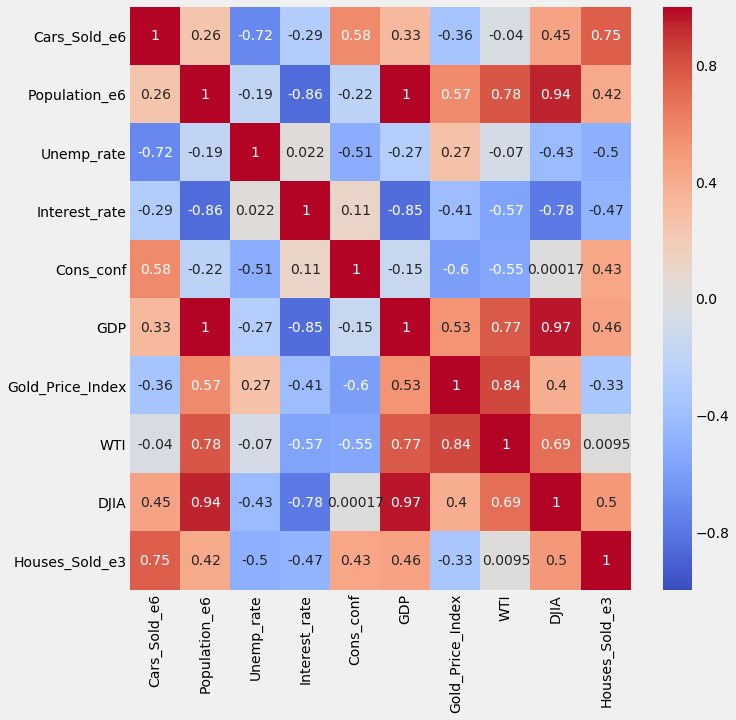

In [35]:
fig, ax = plt.subplots(figsize=(10,10))    
sns.heatmap(result_diff.corr(), cmap="coolwarm", annot=True, vmin=-1, vmax=1);
#plt.title('Heat Map');

In [36]:
#sns.pairplot(result_diff, height=1.2, aspect=1.5);

In [37]:
result_diff.columns

Index(['Cars_Sold_e6', 'Population_e6', 'Unemp_rate', 'Interest_rate',
       'Cons_conf', 'GDP', 'Gold_Price_Index', 'WTI', 'DJIA',
       'Houses_Sold_e3'],
      dtype='object')

## Base Model - LR with Stats Model - Before Feature Engg / Regularization

In [38]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('Cars_Sold_e6 ~ Population_e6 + Unemp_rate + Interest_rate + Cons_conf + Gold_Price_Index + WTI + DJIA + GDP + Houses_Sold_e3', data=result_diff, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit2 = model.fit()

# Print summary statistics of the model's performance
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Cars_Sold_e6   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     21.01
Date:                Fri, 24 Jan 2020   Prob (F-statistic):           8.30e-15
Time:                        09:49:18   Log-Likelihood:                -80.880
No. Observations:                  65   AIC:                             181.8
Df Residuals:                      55   BIC:                             203.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           30.1158     22.645      1.330      0.189     -15.266      75.498
Population_e6    -6.441e-08   2.19e-07     -0.294      0.770   -5.03e-07    3.75e-07
Unemp_rate          -0.5756      0.241     -2.391      0.020      -1.058      -0.093
Interest_rate       -0.3155      0.160     -1.967      0.054      -0.637       0.006
Cons_conf            0.0107      0.023      0.468      0.641      -0.035       0.057
Gold_Price_Index     0.0010      0.002      0.519      0.606      -0.003       0.005
WTI                 -0.0005      0.017     -0.031      0.976      -0.034       0.033
DJIA                 0.0004      0.000      1.788      0.079   -4.31e-05       0.001
GDP                 -0.0005      0.002     -0.264      0.792      -0.004       0.003
Houses_Sold_e3    4.168e-06   1.06e-06      3.936      0.000    2.05e-06    6.29e-06
==============================================================================
Omnibus:                       12.427   Durbin-Watson:                   1.650
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.165
Skew:                           0.935   Prob(JB):                      0.00138
Kurtosis:                       4.168   Cond. No.                     3.51e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.51e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Feature Engineering

In [39]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('Cars_Sold_e6 ~ Population_e6 + Unemp_rate + Interest_rate + Cons_conf', data=result_diff, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit2 = model.fit()

# Print summary statistics of the model's performance
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Cars_Sold_e6   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     31.45
Date:                Fri, 24 Jan 2020   Prob (F-statistic):           4.00e-14
Time:                        09:49:18   Log-Likelihood:                -92.581
No. Observations:                  65   AIC:                             195.2
Df Residuals:                      60   BIC:                             206.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        26.2678      6.706      3.917      0.000      12.854      39.681
Population_e6   -2.7e-08   2.19e-08     -1.233      0.222   -7.08e-08    1.68e-08
Unemp_rate       -0.9686      0.163     -5.927      0.000      -1.295      -0.642
Interest_rate    -0.5263      0.174     -3.023      0.004      -0.875      -0.178
Cons_conf         0.0436      0.016      2.698      0.009       0.011       0.076
==============================================================================
Omnibus:                       18.643   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.398
Skew:                           1.230   Prob(JB):                     8.30e-06
Kurtosis:                       4.609   Cond. No.                     9.07e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.07e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

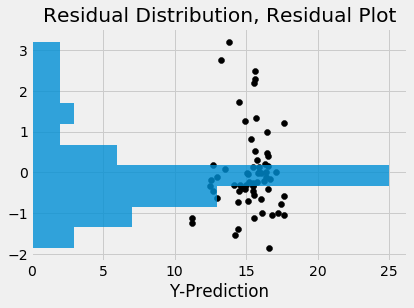

In [49]:

plt.figure(figsize=(6,4))
plt.hist(fit2.resid, bins=10, orientation='horizontal', alpha=0.8);
plt.scatter(fit2.predict(), fit2.resid, color='black');
plt.title('Residual Distribution, Residual Plot')
plt.xlabel('Y-Prediction')
plt.show()

In [ ]:
X = result_diff.iloc[:, 1:]
y = result_diff.iloc[:, 0]
X.shape

In [ ]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=30)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 

split_and_validate(X, y)

## Cross-Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=50) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
#X, y = np.array(X), np.array(y)
kf = KFold(n_splits=4,shuffle=True, random_state=1)
#print(X)

In [ ]:
lr_r2 = []
l1_r2 = []
l2_r2 = []

lr_rmse = []
l1_rmse = []
l2_rmse = []

Y_lr_predicted = []
Y_ridge_predicted = []
Y_lasso_predicted =[]

for tr,te in kf.split(X,y):
#     print("Fold")
    
    lr = LinearRegression()
    l1 = Ridge(alpha=0.1)
    l2 = Lasso(alpha=0.01)
    
    X_tr,X_te = X.iloc[tr] ,X.iloc[te]
    y_tr,y_te = y.iloc[tr] ,y.iloc[te]
    
    scale = StandardScaler()
    #scale.fit(X_tr)
    X_tr_sc = scale.fit_transform(X_tr)
    X_te_sc = scale.transform(X_te)
    
    lr.fit(X_tr_sc,y_tr)
#     print("L1")
    l1.fit(X_tr_sc,y_tr)
#     print("L2")
    l2.fit(X_tr_sc,y_tr)
    
    lr_r2.append(r2_score(y_te,lr.predict(X_te_sc)))
    l1_r2.append(r2_score(y_te,l1.predict(X_te_sc)))
    l2_r2.append(r2_score(y_te,l2.predict(X_te_sc)))
    
    Y_lr_predicted = lr.predict(X)
    Y_ridge_predicted = l1.predict(X)
    Y_lasso_predicted = l2.predict(X)
    
    lr_rmse.append(np.sqrt(mean_squared_error(y_te,lr.predict(X_te_sc))))
    l1_rmse.append(np.sqrt(mean_squared_error(y_te,l1.predict(X_te_sc))))
    l2_rmse.append(np.sqrt(mean_squared_error(y_te,l2.predict(X_te_sc))))


print(f'Lin_Reg Rsquared Value:{np.mean(lr_r2)}, RMSE: {np.mean(lr_rmse)}')
print('\r\n')
print(f'Ridge Rsquared Value:{np.mean(l1_r2)}, RMSE: {np.mean(l1_rmse)}') 
print('\r\n')
print(f'Lasso Rsquared Value:{np.mean(l2_r2)}, RMSE: {np.mean(l2_rmse)}')

for feature, coef in zip(X.columns, lr.coef_):
    print(feature, ':', f'{coef:.2f}') 
#print(X)
#print(Y_lr_predicted)

In [ ]:
plt.hist(X_tr_sc[:,3])
plt.xlabel('Scaled_Feature', size=14)
plt.title('Distribution of Features After Scaling', size=14)

In [ ]:
## Tuning Regularization

In [ ]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

In [ ]:
alphalist = 10**(np.linspace(-1.4,2,400))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    # note the use of a new sklearn utility: Pipeline to pack
    # multiple modeling steps into one fitting process 
    steps = [('standardize', StandardScaler()), 
             ('lasso', Lasso(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_tr, y_tr)
    
    val_set_pred = pipe.predict(X_te)
    err_vec_val[i] = mae(y_te, val_set_pred)
plt.plot(np.log10(alphalist), err_vec_val)
plt.xlabel('alpha', size=14)
plt.ylabel('MAE', size=14)

In [ ]:
result_diff_predict = result_diff.copy()
result_diff_predict['Y_ridge_predicted']=Y_ridge_predicted
result_diff_predict.head()

fig, ax1= plt.subplots(figsize=(8,5))
fig.tight_layout()
color = 'tab:blue'
ax1.plot('Y_ridge_predicted', data=result_diff_predict)#label='Y_ridge_predicted',
ax1.legend(loc='upper left', frameon=False)
ax1.tick_params(axis='x', rotation=90)


color = 'tab:red'
ax2 = ax1.twinx()
ax2.plot(car_sales, linestyle='dashed', color='red', label='Cars_Sold_Actual')#, data=result_diff)
ax2.legend(loc='best', frameon=False)
#ax2.set_ylim(-250, 250)
ax1.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=90)
ax1.set_xlabel('DATE', size=14)
ax1.set_ylabel('Total Units Sold', size=14)


plt.title('Monthly Sales for Passenger Cars in the USA')
plt.xticks(rotation=60);
plt.show()

In [ ]:
std = StandardScaler()
std.fit(X_tr)
X_tr = std.transform(X_tr)

In [ ]:
print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_tr, y_tr, method='lasso')

In [ ]:
# plotting the LARS path
from cycler import cycler
style.use('seaborn')

plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.show()

## Removing Parameters that hit Zero first, from Lasso model

In [ ]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('Cars_Sold_e6 ~ Population_e6 + Unemp_rate + Interest_rate + Cons_conf + Houses_Sold_e3', data=result_diff, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit2 = model.fit()

# Print summary statistics of the model's performance
fit2.summary()